# Tutorial for Possion Process Data Generator

Support methods

1. `possion` custom domain, single dirichlet boundary condition.
2. `possion_square` rectangle domain, can customize four boundary conditions. 

In [1]:
# Packages
import sys; sys.path.append('../')
import matplotlib.pyplot as plt 
from fenics import *
from dolfin import *
from mshr import *
from dgl.data.utils import load_graphs
from src.possion import possion, possion_square
from src.utils.plot import plot_graph

Using backend: pytorch


## Method `possion`

The basic method can allow us to use any shape of mesh. We can generate meshed by easily following [FEniCS build in mesh](https://fenicsproject.org/olddocs/dolfin/1.3.0/python/demo/documented/built-in_meshes/python/documentation.html) or using `generate_mesh` function. [Here](https://fenicsproject.org/olddocs/dolfin/1.3.0/python/demo/documented/mesh-generation/python/documentation.html) is the basic tutorial.  

Howerer, by this method we can only set one single boundary constrain function, it can be constant or function, but will work on every boundary. This means in this method we can not control each boundary separatly. 

First example is the possion equation on square $[0, 1]\times[0, 1]$, with boundary function $x^2 + y^2 + 1$, i.e.
$$-\bigtriangleup(u)=5, x\in D$$
$$u=x^2 + y^2 + 1, x\in\partial D$$

Running possion will generate a binary data file, which is the generated dgl graph. The graph has features

- Node feature `x`: x coordinates for nodes in graph
- Node feature `y`: y coordinates for nodes in graph
- Node feature `value`: values for nodes

Future work will add more features for node and edge.

In [2]:
# Create mesh
mesh = UnitSquareMesh(8, 8)

# Choose boundary condition
ud = '1 + x[0] * x[0] + x[1] * x[1]'

# Choose f in equation
f = '5'

# Set path to save (.bin format)
path = '../data/possion_square.bin'

# Generate
possion(mesh=mesh, 
        ud=ud,
        f=f, 
        path=path)

/home/fedebotu/.local/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


Graph(num_nodes=81, num_edges=416,
      ndata_schemes={'y': Scheme(shape=(), dtype=torch.float64), 'value': Scheme(shape=(), dtype=torch.float64), 'x': Scheme(shape=(), dtype=torch.float64)}
      edata_schemes={})


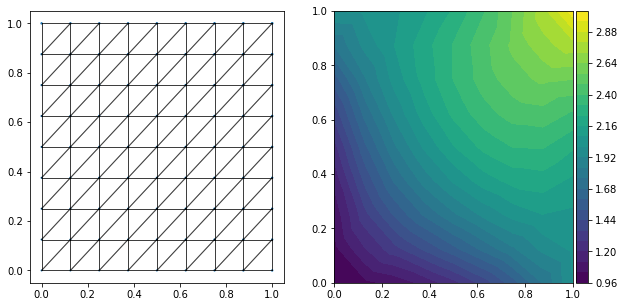

In [3]:
# Load graph
graph = load_graphs('../data/possion_square.bin')[0][0]

# Check result
print(graph)
plot_graph(graph, figsize=(10,5), separate_mesh=True)


We can also try circle shape mesh and L shape mesh

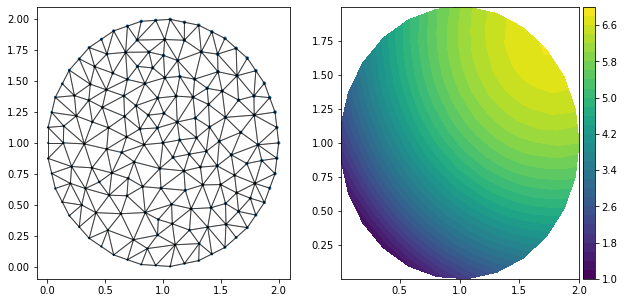

In [4]:
# Circle shape mesh
domain = Circle(Point(1, 1), 1)
mesh = generate_mesh(domain, 8)
ud = '1 + x[0] * x[0] + x[1] * x[1]'
f = '5'
path = '../data/possion_circle.bin'
possion(mesh=mesh, 
        ud=ud,
        f=f, 
        path=path)
graph = load_graphs('../data/possion_circle.bin')[0][0]
plot_graph(graph, figsize=(10,5), separate_mesh=True)

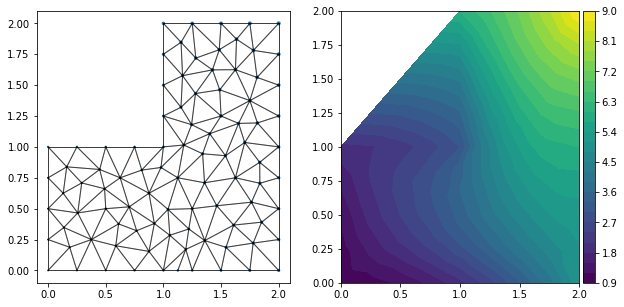

In [5]:
# L shape mesh
rectangle1 = Rectangle(Point(0, 0), Point(2, 1))
rectangle2 = Rectangle(Point(1, 1), Point(2, 2))
mesh = generate_mesh(rectangle1 + rectangle2, 8)
ud = '1 + x[0] * x[0] + x[1] * x[1]'
f = '5'
path = '../data/possion_l.bin'
possion(mesh=mesh, 
        ud=ud,
        f=f, 
        path=path)
graph = load_graphs('../data/possion_l.bin')[0][0]
plot_graph(graph, figsize=(10,5), separate_mesh=True)

## Method `possion_square`

This method is for rectangle domain. In the meanwhile, this method support separatly control boundary conditions for four boundaries, i.e. top, bottom, left and right. For more detail please refer to function comment. 

Example here is on the square $[0, 2]\times[0, 2]$ will set the top and bottom to constant $2$ and left, right to constant $0$. 

In [6]:
possion_square(x0=0,
               xn=2, 
               y0=0, 
               yn=2,
               f='1',
               ud_top='2',
               ud_bottom='2',
               ud_left='0',
               ud_right='0',
               cell_size=8., 
               tol=1e-4, 
               path='../data/possion_square_bc.bin'
               )

/home/fedebotu/.local/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


/home/fedebotu/.local/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


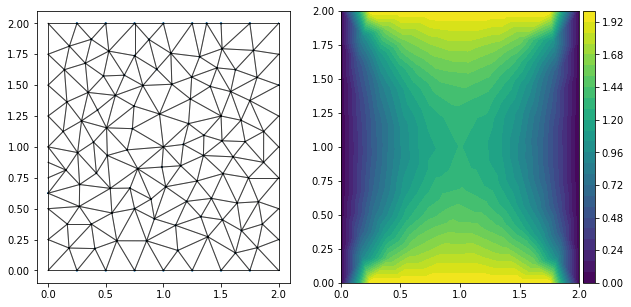

In [7]:
graph = load_graphs('../data/possion_square_bc.bin')[0][0]
plot_graph(graph)

## Extra: changing parameters for the `plot_graph` function
We can also plot the mesh directly on the graph and pass extra parameters to the function.

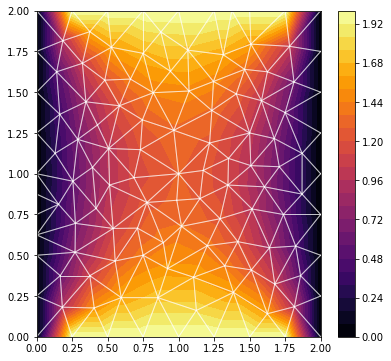

In [15]:
plot_graph(graph, mesh_color='white', separate_mesh=False, figsize=(14, 6), cmap='inferno')